In [1]:
!python3 -m pip install scikit-learn
!python3 -m pip install seaborn

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns
from attrs import define
from abc import ABC, abstractmethod
from math import sqrt, atan2, hypot, sin, cos, pi, log
from typing import Optional, Tuple, List
from scipy.interpolate import griddata
from peak_detection import NausWallenstein

In [3]:
from test_generator import Line, generate_image, apply_general_noise
from polarization import\
    MaxComponentInertionPolarization,\
    InertionPolarization
from cell import Cell
from line_utils import abc2natural, natural2abc, draw_r_phi, draw_abc
from segmentation import grid_from_image, segments_detection, loop_segment_list
from peak_detection import NausWallenstein
from experiment import ExperimentData, run_exp

In [4]:
img = cv.imread("../test-images/thumb001.jpg", 0)
edges = cv.Canny(img, 30, 200)
img

array([[163, 175, 181, ..., 181, 182, 196],
       [185, 168, 179, ..., 191, 164, 163],
       [188, 176, 182, ..., 190, 125, 113],
       ...,
       [220, 220, 220, ..., 188, 167, 184],
       [220, 219, 219, ..., 204, 176, 190],
       [223, 222, 221, ..., 212, 200, 237]], dtype=uint8)

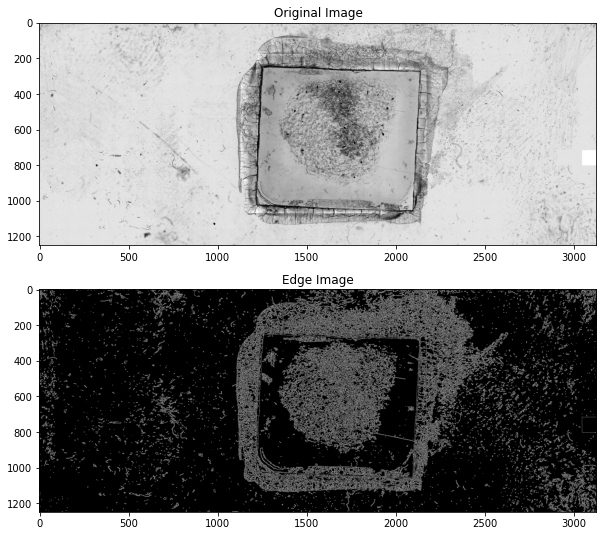

In [5]:
plt.figure(figsize=(15, 9))
plt.subplot(211)
plt.imshow(img, cmap = 'gray')
plt.title('Original Image')

plt.subplot(212)
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image')
plt.show()

In [11]:
exp_data = run_exp(img, 12,
                   polarization_method=MaxComponentInertionPolarization(10, 12),
                   peak_detection_method=NausWallenstein(alpha=0.001, r_window=10, phi_window=0.02))


miss cache
4.972000422190811 20 1562 1564
4.972000422190811 20 1562 1564
4.972000422190811 20 1562 1564
4.972000422190811 23 1562 1564
miss cache
0.19804513907616716 1 23 25
0.19804513907616716 1 23 25
0.19804513907616716 2 23 25
0.19804513907616716 1 23 25
0.19804513907616716 1 23 25
0.19804513907616716 1 23 25
0.19804513907616716 1 23 25
0.19804513907616716 2 23 25
0.19804513907616716 1 23 25
0.19804513907616716 1 23 25
0.19804513907616716 1 23 25
0.19804513907616716 1 23 25
0.19804513907616716 1 23 25
0.19804513907616716 1 23 25
0.19804513907616716 1 23 25
0.19804513907616716 1 23 25
0.19804513907616716 2 23 25
0.19804513907616716 1 23 25
0.19804513907616716 2 23 25
4.972000422190811 22 1562 1564
miss cache
0.18943448085546424 1 22 24
0.18943448085546424 2 22 24
0.18943448085546424 1 22 24
0.18943448085546424 1 22 24
0.18943448085546424 1 22 24
0.18943448085546424 1 22 24
0.18943448085546424 2 22 24
0.18943448085546424 1 22 24
0.18943448085546424 1 22 24
0.18943448085546424 1 22 24


0.23223254207604124 2 30 32
0.23223254207604124 1 30 32
0.23223254207604124 1 30 32
0.23223254207604124 1 30 32
0.23223254207604124 1 30 32
0.23223254207604124 1 30 32
0.23223254207604124 1 30 32
0.23223254207604124 1 30 32
0.23223254207604124 3 30 32
0.23223254207604124 1 30 32
4.972000422190811 30 1562 1564
0.23223254207604124 1 30 32
0.23223254207604124 1 30 32
0.23223254207604124 1 30 32
0.23223254207604124 1 30 32
0.23223254207604124 1 30 32
0.23223254207604124 1 30 32
0.23223254207604124 2 30 32
0.23223254207604124 2 30 32
0.23223254207604124 1 30 32
0.23223254207604124 1 30 32
0.23223254207604124 1 30 32
0.23223254207604124 1 30 32
0.23223254207604124 1 30 32
0.23223254207604124 1 30 32
0.23223254207604124 1 30 32
0.23223254207604124 1 30 32
0.23223254207604124 2 30 32
0.23223254207604124 1 30 32
0.23223254207604124 1 30 32
0.23223254207604124 1 30 32
0.23223254207604124 1 30 32
0.23223254207604124 1 30 32
0.23223254207604124 1 30 32
0.23223254207604124 3 30 32
0.232232542076041

0.3179162003759301 1 30 32
0.3179162003759301 1 30 32
0.3179162003759301 2 30 32
0.3179162003759301 1 30 32
4.972000422190811 33 1562 1564
miss cache
0.3497078204135231 1 33 35
0.3497078204135231 1 33 35
0.3497078204135231 1 33 35
0.3497078204135231 2 33 35
0.3497078204135231 2 33 35
0.3497078204135231 3 33 35
0.3497078204135231 1 33 35
0.3497078204135231 1 33 35
0.3497078204135231 1 33 35
0.3497078204135231 1 33 35
0.3497078204135231 3 33 35
0.3497078204135231 1 33 35
0.3497078204135231 2 33 35
0.3497078204135231 1 33 35
0.3497078204135231 1 33 35
0.3497078204135231 1 33 35
0.3497078204135231 1 33 35
0.3497078204135231 1 33 35
0.3497078204135231 1 33 35
0.3497078204135231 1 33 35
0.3497078204135231 1 33 35
0.3497078204135231 1 33 35
0.3497078204135231 1 33 35
0.3497078204135231 2 33 35
0.3497078204135231 1 33 35
0.3497078204135231 1 33 35
4.972000422190811 24 1562 1564
miss cache
0.2069064075585978 1 24 26
0.2069064075585978 1 24 26
0.2069064075585978 1 24 26
0.2069064075585978 2 24 2

0.215266455517573 1 25 27
4.972000422190811 24 1562 1564
0.212131586154999 1 24 26
0.212131586154999 1 24 26
0.212131586154999 2 24 26
0.212131586154999 1 24 26
0.212131586154999 1 24 26
0.212131586154999 3 24 26
0.212131586154999 3 24 26
0.212131586154999 1 24 26
0.212131586154999 2 24 26
0.212131586154999 1 24 26
0.212131586154999 1 24 26
0.212131586154999 1 24 26
0.212131586154999 1 24 26
0.212131586154999 1 24 26
0.212131586154999 3 24 26
0.212131586154999 2 24 26
4.972000422190811 24 1562 1564
0.21107843956447306 1 24 26
0.21107843956447306 1 24 26
0.21107843956447306 2 24 26
0.21107843956447306 1 24 26
0.21107843956447306 1 24 26
0.21107843956447306 3 24 26
0.21107843956447306 3 24 26
0.21107843956447306 1 24 26
0.21107843956447306 2 24 26
0.21107843956447306 1 24 26
0.21107843956447306 1 24 26
0.21107843956447306 1 24 26
0.21107843956447306 1 24 26
0.21107843956447306 1 24 26
0.21107843956447306 2 24 26
0.21107843956447306 2 24 26
0.21107843956447306 2 24 26
4.972000422190811 23

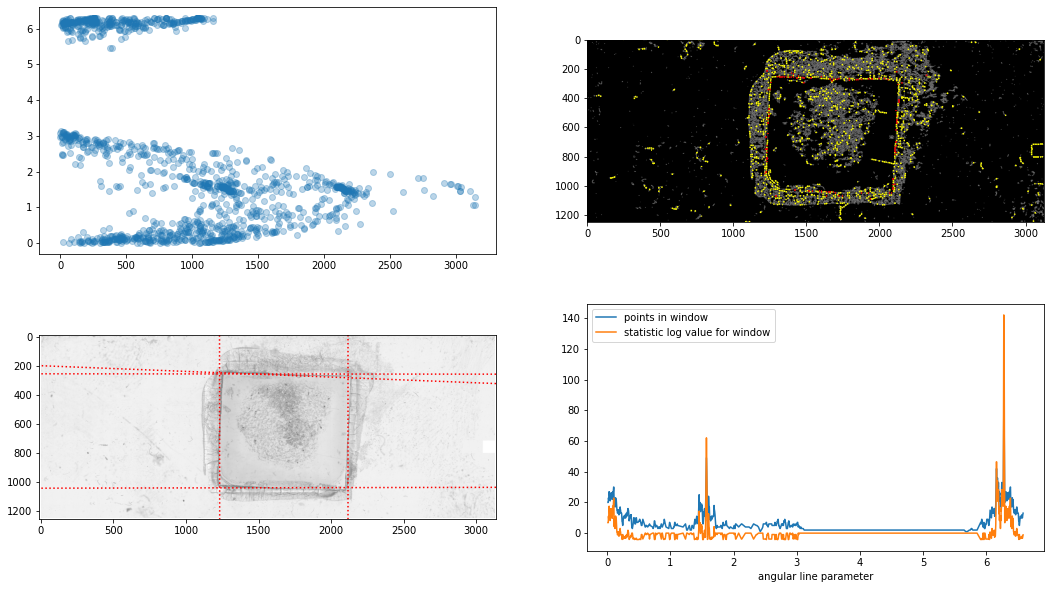

In [12]:
exp_data.visualize(compact=True)

In [8]:
exp_data.windows

{0.011700447729241299: (20, 0.00107296217227483),
 0.013819908611359502: (20, 0.00107296217227483),
 0.014833536019307873: (20, 0.00107296217227483),
 0.01921232147773955: (23, 1.4432488550255291e-05),
 0.020645395265769768: (22, 6.375859582515021e-05),
 0.023958506662851736: (23, 1.4432488550255291e-05),
 0.02529940678311728: (24, 3.119184215147194e-06),
 0.02659543107610107: (25, 6.449552341984653e-07),
 0.028995888996866472: (27, 2.432499983904322e-08),
 0.030152530694169163: (26, 1.278259564712508e-07),
 0.03094798249901148: (26, 1.278259564712508e-07),
 0.032593815772254425: (26, 1.278259564712508e-07),
 0.03465799467371886: (25, 6.449552341984653e-07),
 0.03590868235531361: (24, 3.119184215147194e-06),
 0.03773688125109503: (24, 3.119184215147194e-06),
 0.039062685059144266: (23, 1.4432488550255291e-05),
 0.04042849850641473: (24, 3.119184215147194e-06),
 0.04307551513725121: (22, 6.375859582515021e-05),
 0.04398672438023825: (22, 6.375859582515021e-05),
 0.04541673537731813: (21

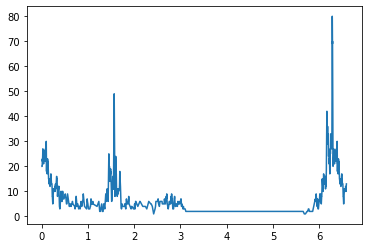

In [9]:
    from math import log
    x, y, z = [], [], []

    for k, v in exp_data.windows.items():
        x.append(k)
        y.append(v[0])
        z.append(-log(v[1]))
    plt.plot(x, y)
    #plt.plot(x, z)

In [10]:
print(len(list(filter(lambda x: abs(x[1]) < 0.03, lst))))

NameError: name 'lst' is not defined

In [ ]:
method = NausWallenstein(alpha=0.1)
peaks, windows = method.detect_peaks(lst, 5)

In [ ]:
window_list = list(windows.items())
window_list.sort(key=lambda x: x[0])
x, y = [], []
for i in window_list:
    x.append(i[0])
    y.append(i[1][0])
plt.plot(x, y)
print(*sorted(window_list, key=lambda x: x[1][0])[-40:])

In [ ]:
run_exp(img,
        10,
        compact=False,
        polarization_method=MaxComponentInertionPolarization(),
        peak_detection_method=NausWallenstein(alpha=1))

In [ ]:
current_img = generate_image([Line(1370, 0, 1, 0)], h=1500, w=2000)
plt.imshow(current_img)

In [ ]:
plt.imshow(current_img)
draw_abc(natural2abc((1370, 3.57)))
abc2natural(natural2abc((1370, 0)))

In [ ]:
for i in range(10):
    current_img = generate_image([Line(150, 1, 1, 0.1 * i)])
    apply_general_noise(current_img, lambda: np.random.normal(20, 50, 2), 0.02 * i )
    print("angular coeff = {}".format(0.01 * i))
    run_exp(current_img, grid_size=10, compact=True, polarization_method=MaxComponentInertionPolarization(), lines_count=3)

In [ ]:
#x, y, c = zip(*segments)
#phi = list(map(lambda x: atan2(x[1], x[0]), zip(x, y)))
r, phi = zip(*segments)
plt.scatter(r, phi, alpha=0.1)

In [ ]:
eps = 0.01
by_neighbour_amount = []
for one in segments:
    count = 0
    for other in segments:
        if abs(one[0] - other[0]) < eps * 100 and abs(one[1] - other[1]) < eps:#and abs(one[2] - other[2]) < eps:
            count += 1
    by_neighbour_amount.append((one, count))

In [ ]:
by_neighbour_amount.sort(key=lambda x: -x[1])

In [ ]:
plt.imshow(test_img, cmap='gray')
for i in range(20):
    print(by_neighbour_amount[i])
    draw_r_phi(by_neighbour_amount[i][0])

In [ ]:
arr = [(1, 2,3), (4, 5, 6)]
np.array(arr)

In [ ]:
np.zeros(5)

In [ ]:
for i, elem in enumerate(arr):
    print(i, elem)